In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [39]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [40]:
x_train.shape

(60000, 28, 28)

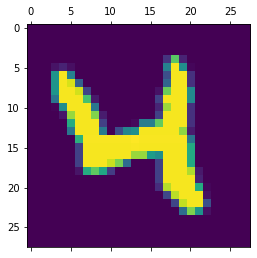

4


In [41]:
plt.matshow(x_train[20])
plt.show()
print(y_train[20])

In [42]:
#Scaling
x_train = x_train/255
x_test = x_test/255

In [43]:
#Flatten an image
# we need (60000,28,28) ==> (60000,28*28)
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)
x_train_flat.shape

(60000, 784)

In [66]:
#Single layer Model
model = keras.Sequential([
 keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])
#10 = 10 differnt o/p possible as the dataset has 10 types (0 to 9) of digits.
#Input_shape = no of features in one data point
model.compile(
    optimizer='sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7738 - accuracy: 0.8167
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4565 - accuracy: 0.8807
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4036 - accuracy: 0.8913
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8972
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3603 - accuracy: 0.9008


In [45]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.9268


[0.26823553442955017, 0.926800012588501]

In [46]:
ypred = model.predict(x_test_flat)

313/313 [==============================] - 0s 1ms/step


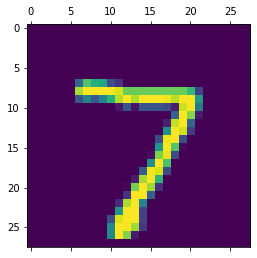

In [47]:
plt.matshow(x_test[0])
plt.show()

In [37]:
ypred[0]
#It is giving sigmoid of 10 differnt digits, whichever is the max that is the label.

array([1.6579138e-02, 2.4751822e-07, 4.0372308e-02, 9.2811328e-01,
       1.7000661e-03, 8.8164411e-02, 1.1834961e-06, 9.9972564e-01,
       7.2233096e-02, 6.1471438e-01], dtype=float32)

In [48]:
np.argmax(ypred[0])

7

In [53]:
ypred_labels = [np.argmax(i) for i in ypred]
ypred_labels[:5]
#Keeping the labels in one list.

[7, 2, 1, 0, 4]

<AxesSubplot:>

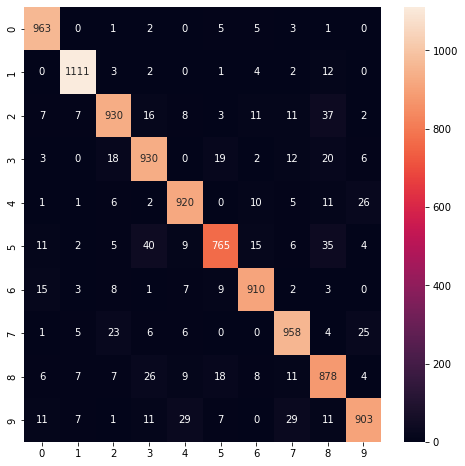

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=ypred_labels),annot=True,fmt='d')

In [67]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
#Double layer
# 1st layer having 100 neurons. You can have any number of neurons.
# 2nd layer is the o/p which has 10 differnt o/ps.
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3150 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1271 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0491 - accuracy: 0.9847


In [62]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.9723


[0.08967223763465881, 0.9722999930381775]

In [63]:
ypred = model.predict(x_test_flat)
ypred_labels = [np.argmax(i) for i in ypred]
ypred_labels[:5]

313/313 [==============================] - 1s 2ms/step


[7, 2, 1, 0, 4]

<AxesSubplot:>

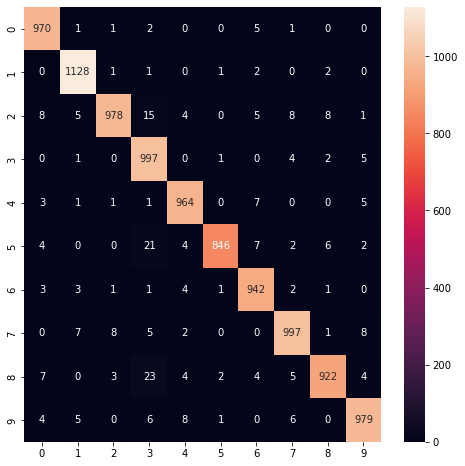

In [64]:
plt.figure(figsize=(8,8))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=ypred_labels),annot=True,fmt='d')

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
#Here the image is flattend by the help of keras.
# No need to give the i/p shape again in the first layer.
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2706 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1228 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0845 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0502 - accuracy: 0.9844


In [74]:
x_test = x_test.reshape(len(x_test),28*28)
a = pd.DataFrame(x_test)
a

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
